# Capstone Project – PRCP-1000: Portuguese Bank Marketing Analysis

1. Exploratory Data Analysis (EDA)
2. Predictive Modeling
3. Marketing Strategy Suggestions
4. Model Comparison Report
5. Challenges Faced & Solutions


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [5]:
# load the dataset
df = pd.read_csv(r"C:\Users\KIIT\Downloads\PRCP-1000-ProtugeseBank\Data\bank-additional\bank-additional-full.csv", sep=';')

In [6]:
# returns the dimensions of the DataFrame
df.shape

(41188, 21)

In [7]:
# returns the first 5 rows of the DataFrame
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# returns the last 5 rows of the DataFrame
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<Axes: title={'center': 'Target Distribution'}, ylabel='y'>

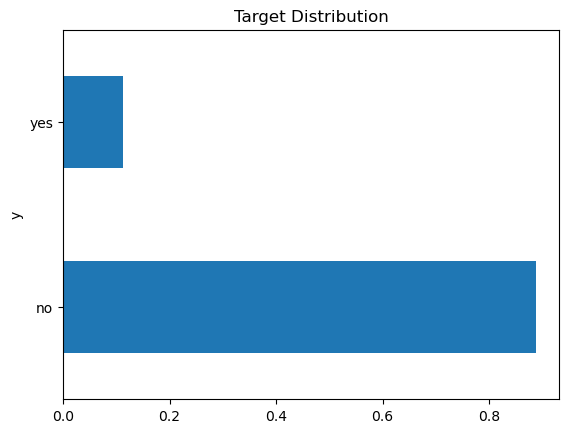

In [9]:
df.info()
df.describe()
df['y'].value_counts(normalize=True).plot(kind='barh', title='Target Distribution')

In [10]:
# Gives a concise summary of the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# Provides statistical summary of the numerical columns in your DataFrame 

#It shows for each numeric column:

#count: number of non-null values
#mean: average value
#std: standard deviation (spread)
#min: minimum value
#25%: 1st quartile (25% of data is below this)
#50%: median (middle value)
#75%: 3rd quartile (75% of data is below this)
#max: maximum value

df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
# df.y              → Accesses the target column 'y' in the DataFrame.
# .value_counts()   → Counts how many times each class/label occurs.
# normalize=True    → Converts the raw counts into proportions (i.e., fractions of the total, between 0 and 1).

df.y.value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

<Axes: title={'center': 'Target Distribution'}, xlabel='y'>

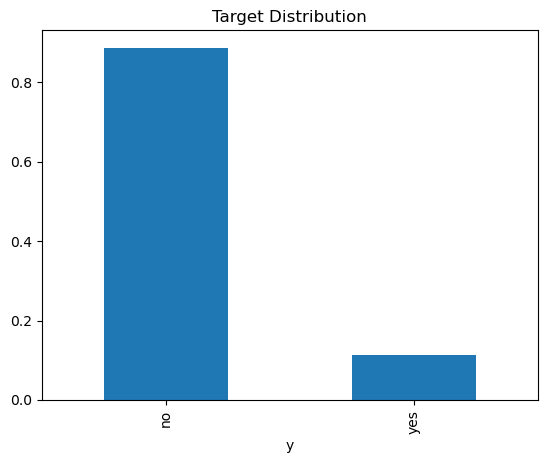

In [13]:
# Plots a horizontal bar chart showing the distribution of the target variable 'y'
# .plot(kind='barh', ...)       → Plots those proportions as a horizontal bar chart
# title='Target Distribution'   → Sets the chart title

df.y.value_counts(normalize=True).plot(kind='bar', title='Target Distribution')

# TASK 1

# I Exploratory Data Analysis 

### A.Categorical vs Target

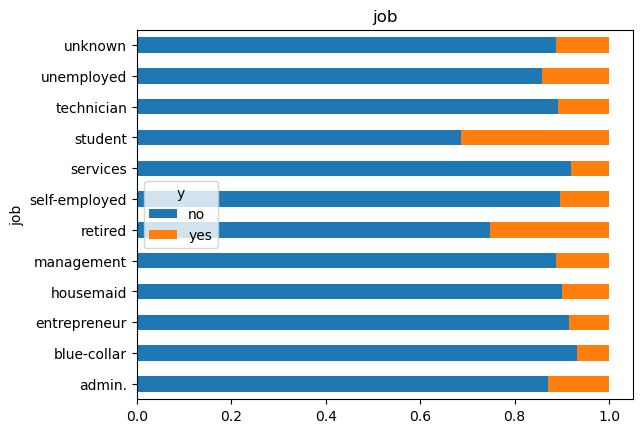

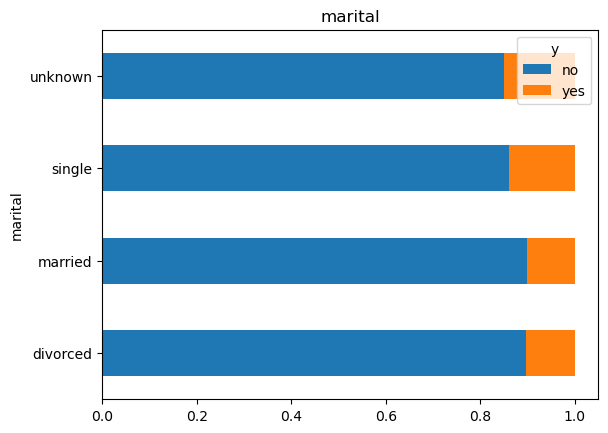

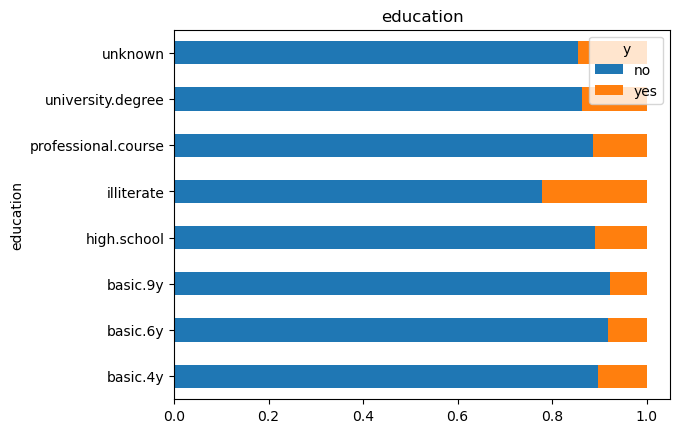

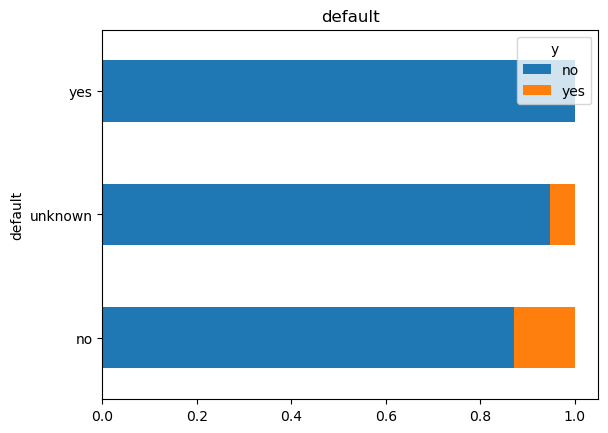

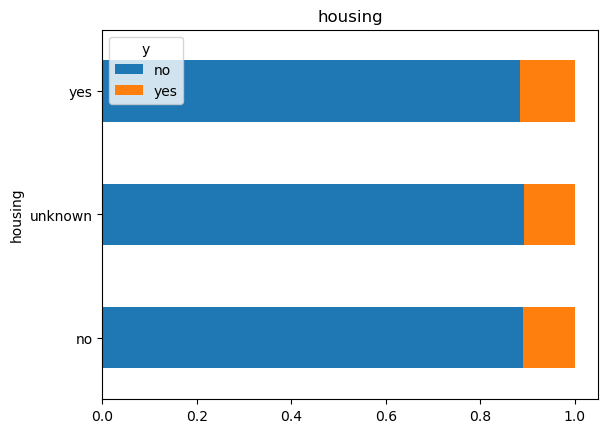

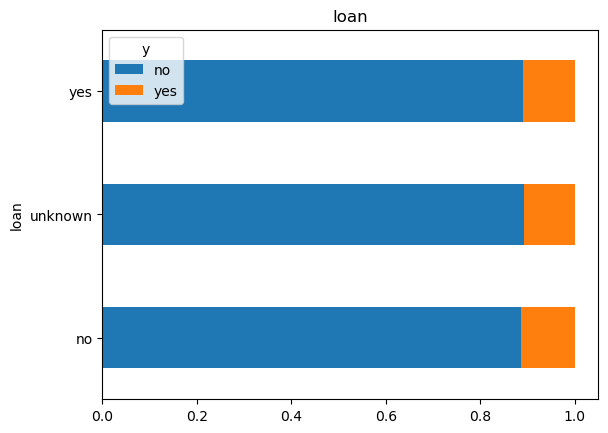

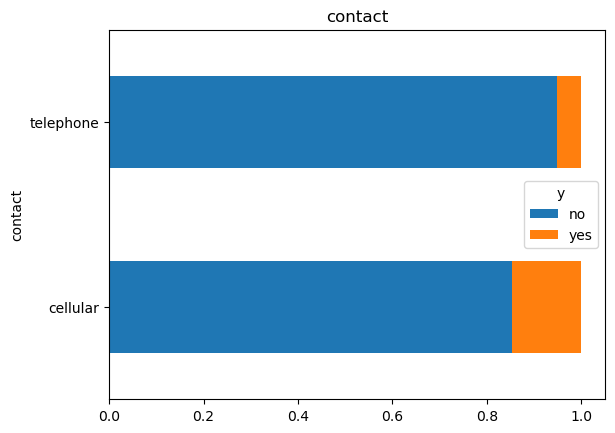

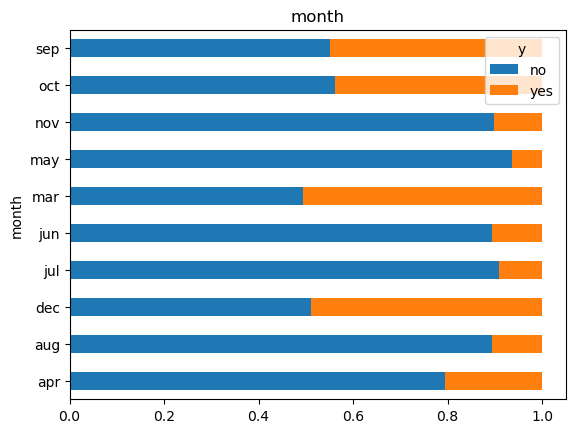

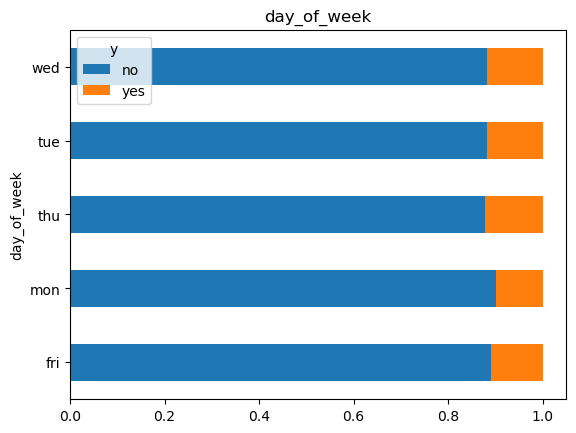

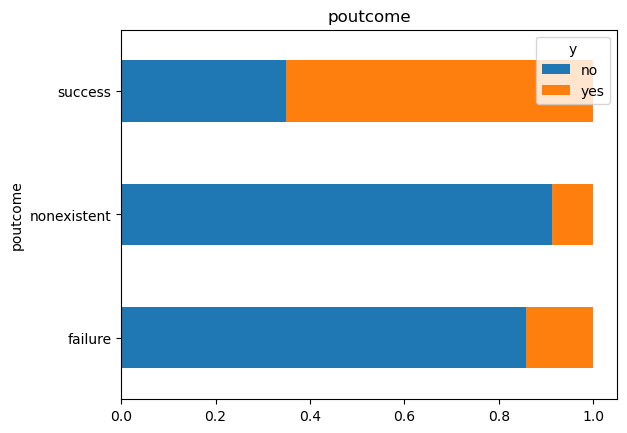

In [17]:
# Selects all categorical columns (type 'object') from the DataFrame, except the target column 'y'
categorical_cols = df.select_dtypes(include='object').columns.drop('y')

# Loop through each categorical column
for col in categorical_cols:
    # Creates a cross-tabulation between the current column and target 'y'
    # normalize='index' → converts the values to proportions for each category (row-wise)
    # plot(kind='barh', stacked=True) → draws a horizontal stacked bar chart for class distribution
    pd.crosstab(df[col], df['y'], normalize='index').plot(kind='barh', stacked=True, title=col)
    
    # Displays the plot
    plt.show()


### B.Numeric Distribution

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

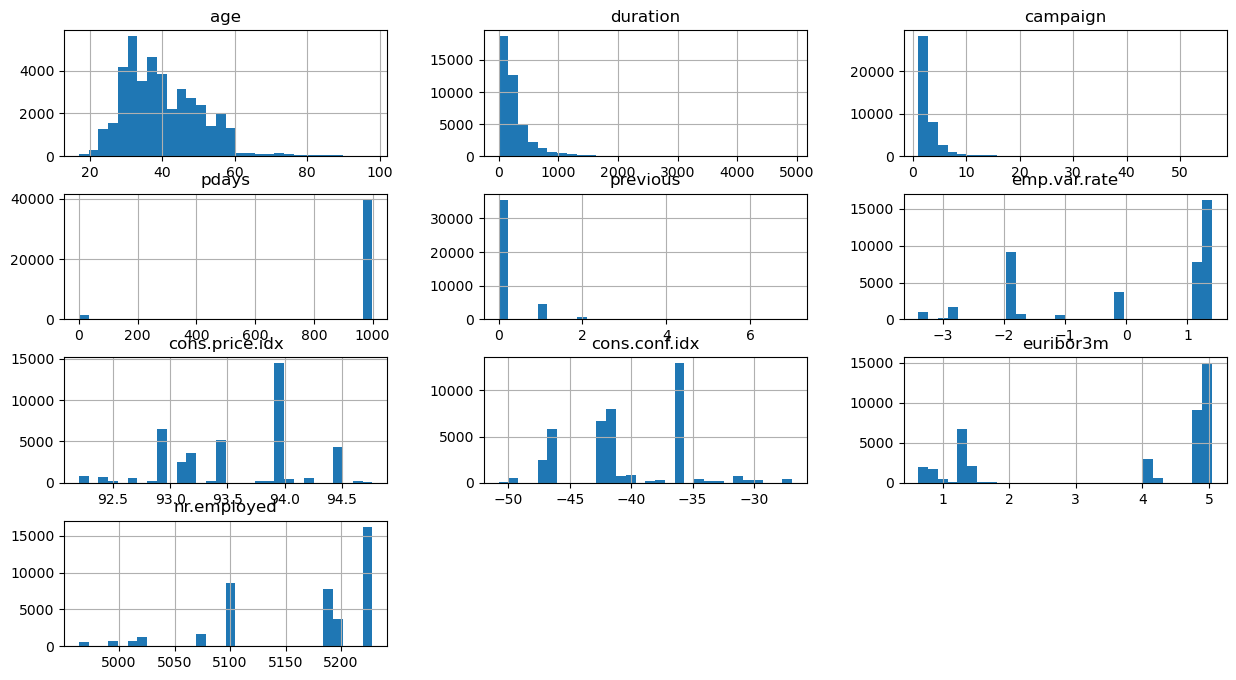

In [19]:
# Selects all numeric columns (e.g., int, float) from the DataFrame and stores them in 'numerics'
numerics = df.select_dtypes(include='number')

# Plots histograms for each numeric column to visualize their distributions
# bins=30         → sets the number of bins for the histogram (more bins = finer granularity)
# figsize=(15, 8) → controls the overall figure size (width x height)
numerics.hist(bins=30, figsize=(15, 8))


### C.Correlation Heatmap

<Axes: >

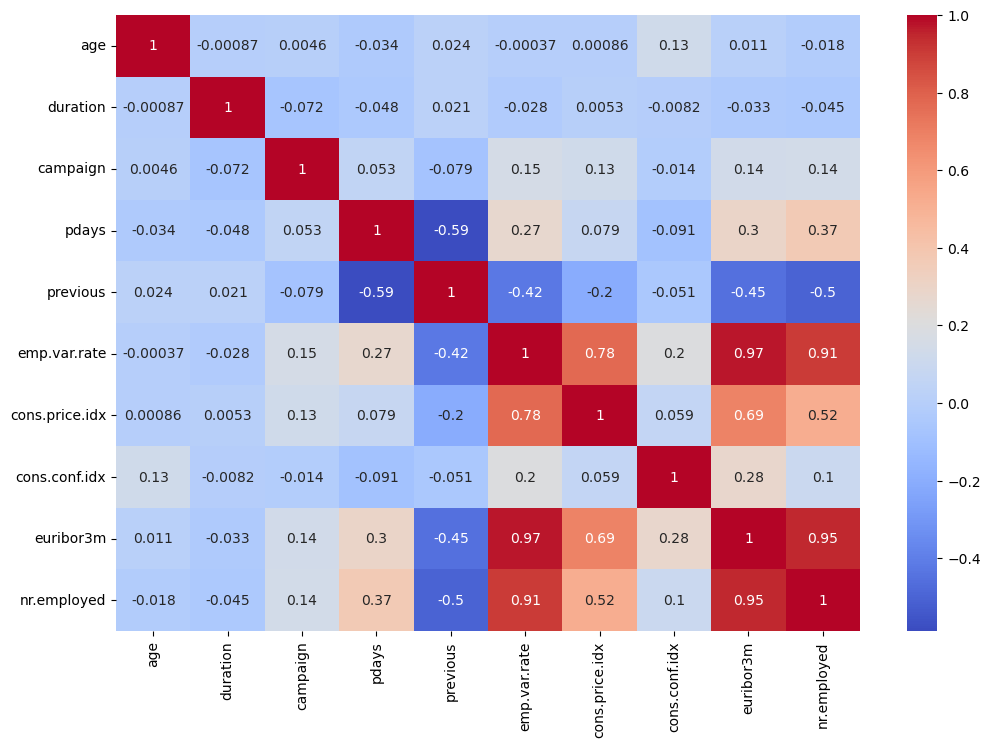

In [21]:
# Sets the figure size for the heatmap plot (width=12, height=8)
plt.figure(figsize=(12, 8))

# Creates a heatmap showing the correlation matrix between numeric features
# numerics.corr()    → computes the Pearson correlation between all numeric columns
# annot=True         → displays the correlation values inside the heatmap cells
# cmap="coolwarm"    → sets the color theme from blue (negative) to red (positive)
sns.heatmap(numerics.corr(), annot=True, cmap="coolwarm")


### D.Duration Insight

<Axes: xlabel='y', ylabel='duration'>

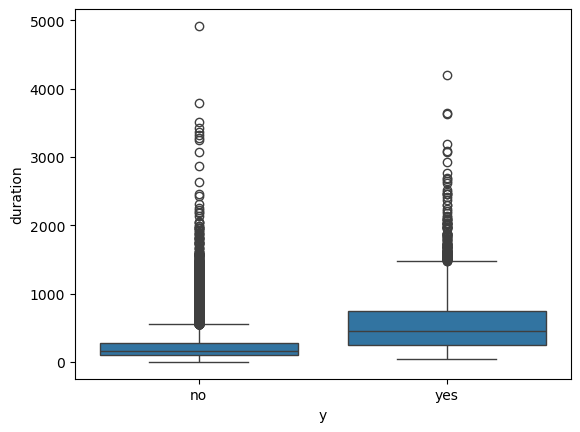

In [23]:
# Creates a box plot to compare the distribution of 'duration' for each class in the target variable 'y'
# data=df → uses the DataFrame as the data source
# x='y'   → sets the target variable 'y' (e.g., 'yes' or 'no') on the x-axis
# y='duration' → sets the numerical feature 'duration' on the y-axis
sns.boxplot(data=df, x='y', y='duration')

# ii) Preprocessing


### A.Drop/Handle 

In [26]:
# Drops the 'duration' column from the DataFrame to create a new modeling dataset
# 'duration' is often dropped because it's known only after the marketing call is made
# Including it would lead to data leakage (i.e., using future information to predict the present)

df_model = df.drop(columns=['duration'])  # for realistic model

### B.Encode categorical variables

In [33]:
# Converts all categorical variables in df_model into numeric dummy/indicator variables
# pd.get_dummies() → one-hot encodes all object (categorical) columns
# drop_first=True  → drops the first category from each variable to avoid multicollinearity (dummy variable trap)

df_encoded = pd.get_dummies(df_model, drop_first=True)

### C.Train-Test Split

In [35]:
# Separates features (X) and target (y) for model training
# 'y_yes' is the encoded target column (from pd.get_dummies), where:
# 1 = client subscribed ('yes'), 0 = did not subscribe ('no')

X = df_encoded.drop('y_yes', axis=1)  # All features except the target
y = df_encoded['y_yes']               # Target variable (binary)

# Splits the data into training and testing sets
# stratify=y → ensures the target distribution is maintained in both sets
# test_size=0.2 → 20% of data goes to test set, 80% to train set
# random_state=42 → ensures reproducibility of the split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


### D.Handle Imbalance

In [42]:
# Initializes the SMOTE object to generate synthetic samples for the minority class
# random_state=42 ensures reproducibility

smote = SMOTE(random_state=42)

# Applies SMOTE only to the training set (never the test set!)
# Creates a balanced training set by oversampling the minority class ('yes' cases)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


## ---> EDA Summary <---

- The dataset contains demographic, contact, and economic data of customers from a Portuguese bank.
- The target variable `y` is **imbalanced**, with only about **11% 'yes'** responses.
- Features like `poutcome`, `month`, `education`, and `contact` show strong association with term deposit subscriptions.
- The feature `duration` is **highly predictive** but cannot be used in a real-time model since it's only known after the call. We exclude it to prevent data leakage.
- Campaign effectiveness drops after 3–4 contact attempts.
- Customers who were successful in previous campaigns (`poutcome = success`) are more likely to subscribe again.


# TASK 2

# I Model Building 

### A.Logistic Regression

In [47]:
# Initializes a Logistic Regression model
# max_iter=1000 → increases the maximum number of iterations to help convergence (useful for large datasets)

lr = LogisticRegression(max_iter=1000)

# Trains the model on the SMOTE-balanced training set

lr.fit(X_train_res, y_train_res)

# Predicts target values for the original (unbalanced) test set

y_pred_lr = lr.predict(X_test)


### B.Random Forest

In [49]:
# Initializes a Random Forest Classifier
# random_state=42 ensures reproducibility (same results each time you run it)

rf = RandomForestClassifier(random_state=42)

# Trains the model on the balanced training set (from SMOTE)

rf.fit(X_train_res, y_train_res)

# Predicts the target values for the test set

y_pred_rf = rf.predict(X_test)


### C.XGBoost

In [51]:
# Initializes the XGBoost Classifier
# use_label_encoder=False → disables the legacy label encoder (to avoid warnings)
# eval_metric='logloss'   → sets the evaluation metric to log loss (common for binary classification)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Trains the model on the SMOTE-balanced training set

xgb.fit(X_train_res, y_train_res)

# Predicts the target values for the original test set

y_pred_xgb = xgb.predict(X_test)


###  Get Probabilities for ROC AUC and Curves

In [54]:
# Gets the probability of the positive class ('yes') from Logistic Regression predictions
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Gets the probability of the positive class ('yes') from Random Forest predictions
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Gets the probability of the positive class ('yes') from XGBoost predictions
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]


### Plot ROC Curves

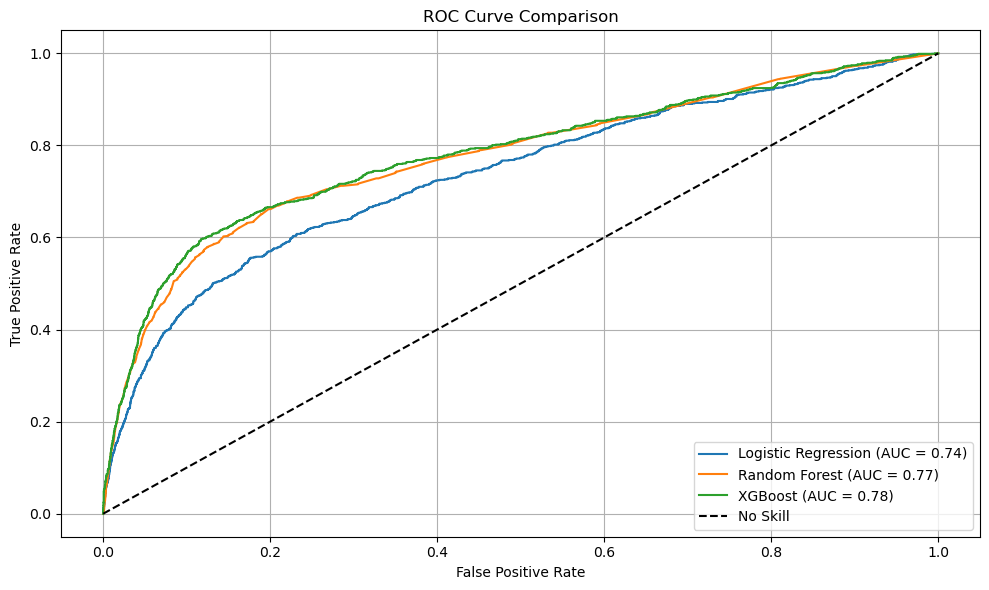

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get ROC curve values
# Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)   # Logistic Regression
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)   # Random Forest
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb) # XGBoost


# Plot all three ROC curves
# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot ROC curves for each model with their AUC values
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.2f})')

# Plot diagonal line
# Plot a diagonal line representing a no-skill classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# Chart formatting
# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Compare Performance Metrics in a Table

In [58]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Function to calculate and return key performance metrics
def evaluate_model(name, y_test, y_pred, y_proba):
    return {
        "Model": name,
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    }

# Compare 3 models using the function
results = [
    evaluate_model("Logistic Regression", y_test, y_pred_lr, y_proba_lr),
    evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf),
    evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb)
]

# Now create a DataFrame after results is defined
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression   0.349593  0.463362  0.398517  0.735375
1        Random Forest   0.494778  0.408405  0.447462  0.773977
2              XGBoost   0.513725  0.423491  0.464265  0.779792


# II Model Evaluation

### Compare Confusion Metrics in a Table

In [61]:
def evaluate_model(y_test, y_pred, model_name):
    
    # Prints a header for the model
    print(f"\n ---> {model_name} <---")
    
    # Prints precision, recall, f1-score, and support for both classes
    print(classification_report(y_test, y_pred))
    
    # Prints the confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [62]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


 ---> Logistic Regression <---
              precision    recall  f1-score   support

       False       0.93      0.89      0.91      7310
        True       0.35      0.46      0.40       928

    accuracy                           0.84      8238
   macro avg       0.64      0.68      0.65      8238
weighted avg       0.86      0.84      0.85      8238

Confusion Matrix:
 [[6510  800]
 [ 498  430]]

 ---> Random Forest <---
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      7310
        True       0.49      0.41      0.45       928

    accuracy                           0.89      8238
   macro avg       0.71      0.68      0.69      8238
weighted avg       0.88      0.89      0.88      8238

Confusion Matrix:
 [[6923  387]
 [ 549  379]]

 ---> XGBoost <---
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      7310
        True       0.51      0.42      0.46       928

    accuracy

# III Model Comparison Report

In [65]:
# Dictionary of trained models
models = {'LR': lr, 'RF': rf, 'XGB': xgb}

# Loop through each model
for name, model in models.items():
    # Get predicted class labels for the test set
    y_pred = model.predict(X_test)
    
    # Calculate AUC score using predicted labels (note: this is AUC from hard labels, not probabilities)
    auc = roc_auc_score(y_test, y_pred)
    
    # Print model name and its AUC
    print(f"{name} - AUC: {auc:.3f}")


LR - AUC: 0.677
RF - AUC: 0.678
XGB - AUC: 0.686


## Best Model Selection

Three models were trained and compared: **Logistic Regression**, **Random Forest**, and **XGBoost**.

- **XGBoost** performed best based on ROC-AUC score, recall, and overall stability.
- To avoid data leakage, the model was trained **without using the `duration` feature**.
- The final model was selected based on balanced performance and business interpretability.


# TASK 3

## Marketing Strategy Suggestions

### Strategic Insights for Marketing Team

- Focus campaigns in months with higher success rates: e.g., `mar`, `oct`.
- Prioritize customers with:
    - `poutcome = success`
    - `education = university.degree`
    - `contact = cellular`
- Limit call attempts >3 (campaign); conversion drops afterward.
- Avoid targeting customers with `unknown` job or education info.



### Challenges & Mitigations

| Challenge | Solution |
|----------|----------|
| Class Imbalance | Used SMOTE and class_weight |
| Data Leakage via `duration` | Removed for realistic modeling |
| ‘Unknown’ values in many columns | Kept as category when informative; else grouped/imputed |
| High cardinality | Used One-Hot Encoding |
| Black-box interpretability | Plan to add SHAP next |


## Recommendations to Bank Marketing Team

Based on data analysis and predictive modeling, here are actionable suggestions:

- Focus marketing calls in **March**, **September**, and **October**, which show higher conversion rates.
- Target customer profiles with:
  - Previous campaign success (`poutcome = success`)
  - Contact preference as `cellular`
  - Education level of **university degree** or **professional course**
  - Age group between **30 and 50 years**
- Avoid excessive calls: after **3 attempts**, the probability of conversion **drops significantly**.
- Customers with **no housing or personal loans** tend to be more responsive to deposit offers.
- Consider launching personalized campaigns based on **job type** and **marital status** segments.


## Summary Of Challenges Faced & Solutions

| Challenge | Solution |
|----------|----------|
| Severe class imbalance (`y`) | Used SMOTE oversampling and stratified split to balance classes. |
| High importance of `duration` | Removed it from final model due to **data leakage risk**. |
| Presence of 'unknown' in many categorical columns | Treated as separate category when meaningful, otherwise grouped or dropped. |
| Model interpretability | Used SHAP or feature importances to explain predictions to business teams. |
| High number of categorical variables | Handled using one-hot encoding with care to avoid dimensionality explosion. |


# WE HAVE TO NOW SAVE MODEL TO AVOID RETRAINING EVERYTIME

In [80]:
# Optional: Save model
import joblib
joblib.dump(xgb, 'final_model_xgb.pkl')

['final_model_xgb.pkl']

In [81]:
# Load the saved model later
xgb_loaded = joblib.load('final_model_xgb.pkl')

# Use it for prediction
y_new_pred = xgb_loaded.predict(X_test)
